https://github.com/umbcdata601/spring2018/blob/master/jupyter_notebooks/L05%20-%20Machine%20Learning.ipynb

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

import pandas
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_features=2, centers=2, random_state=42)
df = pandas.DataFrame(X)

#  Add the target variable into the dataframe (this let's seaborn color based on it)
df['target'] = y

#  Name the columns
df.columns = ['x', 'y', 'target']
print(df.shape)
df.head()

(100, 3)


,x,y,target
0,-2.988372,8.828627,0
1,5.722930,3.026972,1
2,-3.053580,9.125209,0
3,5.461939,3.869963,1
4,4.867339,3.280312,1


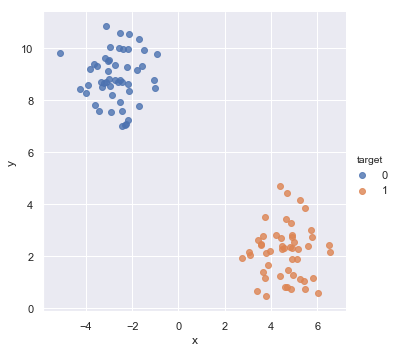

In [3]:
facetgrid = sns.lmplot(data=df, x='x', y='y', hue='target', fit_reg=False)

These are two different classes in our dataset. The blue dots are one class (class 0) and the green dots are another (class 1).

The process of "learning a model" to classify these points learns to draw a line between them. On one side of the line is class 0, the other side is class 1.

## manually specified decision boundaries

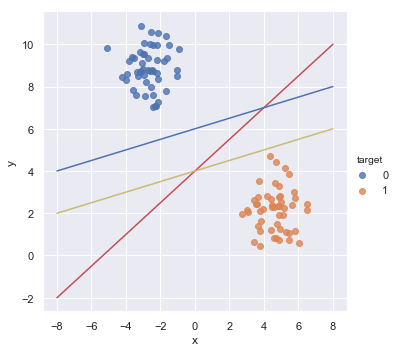

In [4]:
facetgrid = sns.lmplot(data=df, x='x', y='y', hue='target', fit_reg=False)

#  Plotting a line takes the two x arguments first, then the two y arguments
_=plt.plot([-8, 8], [-2, 10], color='r')
#  There are lots of other possible lines separating these blobs. For example,
_=plt.plot([-8, 8], [2, 6], color='y')
_=plt.plot([-8, 8], [4, 8], color='b')


In [5]:
from sklearn.linear_model import LogisticRegression

#  Create a logistic regression classifier 
#
#  In sklearn parlance, this is an Estimator and can be .fit()
#  to data and can .predict() on data.
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Given a trained model, how would these examples be classified?

In [6]:
new_examples = [
    [-4, 10],
    [10, -4],
    [2,   0]
]

# predict where these new samples lie.
clf.predict(new_examples)

array([0, 1, 1])

In [7]:
import numpy as np
#  Create a grid on which we can show the decision boundary.
xx, yy = np.mgrid[-10:10:.01, -4:12:.01]
xx

array([[-10.  , -10.  , -10.  , ..., -10.  , -10.  , -10.  ],
       [ -9.99,  -9.99,  -9.99, ...,  -9.99,  -9.99,  -9.99],
       [ -9.98,  -9.98,  -9.98, ...,  -9.98,  -9.98,  -9.98],
       ...,
       [  9.97,   9.97,   9.97, ...,   9.97,   9.97,   9.97],
       [  9.98,   9.98,   9.98, ...,   9.98,   9.98,   9.98],
       [  9.99,   9.99,   9.99, ...,   9.99,   9.99,   9.99]])

In [8]:
yy

array([[-4.  , -3.99, -3.98, ..., 11.97, 11.98, 11.99],
       [-4.  , -3.99, -3.98, ..., 11.97, 11.98, 11.99],
       [-4.  , -3.99, -3.98, ..., 11.97, 11.98, 11.99],
       ...,
       [-4.  , -3.99, -3.98, ..., 11.97, 11.98, 11.99],
       [-4.  , -3.99, -3.98, ..., 11.97, 11.98, 11.99],
       [-4.  , -3.99, -3.98, ..., 11.97, 11.98, 11.99]])

In [9]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
grid = np.c_[xx.ravel(), yy.ravel()] # array concatenate; https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html

#  Observe that grid is now the set of all points on the diagram 
#  above, by 0.01 increments.
grid

array([[-10.  ,  -4.  ],
       [-10.  ,  -3.99],
       [-10.  ,  -3.98],
       ...,
       [  9.99,  11.97],
       [  9.99,  11.98],
       [  9.99,  11.99]])

[(-4, 12), Text(0,0.5,'$X_2$'), (-10, 10), Text(0.5,0,'$X_1$'), None]

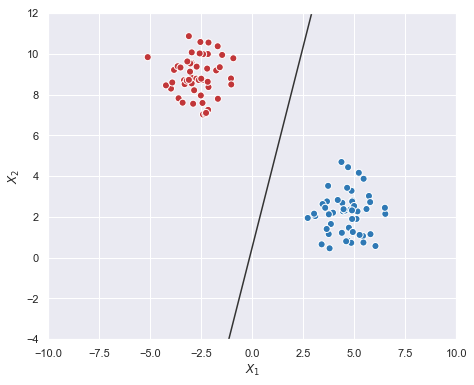

In [10]:
#  Now we want to predict over the entire grid.  That is, we want to
#  predict the probability of class 0 for each point in the plane.
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

#  Then we plot this as a contour plot showing only the decision
#  boundary (level=0.5 is the midpoint)
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

#  Then add the training data samples on top.
ax.scatter(X[:,0], X[:, 1], c=y[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

#  ... and add some labels.
ax.set(aspect="equal",
       xlim=(-10, 10), ylim=(-4, 12),
       xlabel="$X_1$", ylabel="$X_2$")

In [11]:
#  We can make predictions for individual points too.  
#  Note that predict takes a list of samples that are 
#  of the same form as the training inputs (in this case, 
#  (x,y) pairs)
clf.predict([[-0.3, 0], [0.1, 0]])

array([0, 1])

In [12]:
#  Or predict the probabilities of each class.
clf.predict_proba([[-0.3, 0], [0.1, 0]])

array([[0.5569519 , 0.4430481 ],
       [0.42032092, 0.57967908]])

[(-4, 12), Text(0,0.5,'$X_2$'), (-10, 10), Text(0.5,0,'$X_1$'), None]

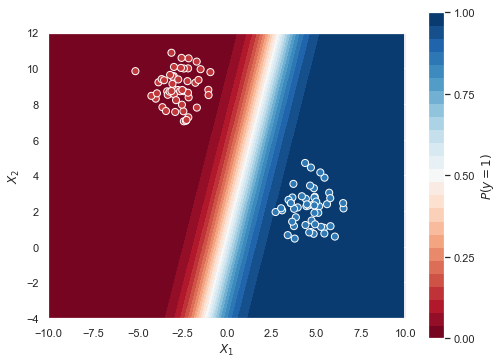

In [13]:
xx, yy = np.mgrid[-10:10:.1, -4:12:.1]
grid = np.c_[xx.ravel(), yy.ravel()]

#  Calculate the probability of class 1 for each sample
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

#  Use this version to show just the classes, not the probability.
#probs = clf.predict(grid).reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-10, 10), ylim=(-4, 12),
       xlabel="$X_1$", ylabel="$X_2$")

In [14]:
12*24


288

In [15]:
288*30

8640